In [4]:
import pandas as pd

data = pd.read_csv("./data/internet_session.csv")

data.tail()

,name,start_time,usage_time,IP,MAC,upload,download,total_transfer,seession_break_reason
4707,user9,2022-11-04 01:11:34,00:06:54:32,10.55.4.189,DA:2F:97:0E:B7:D0,107960.32,2390753.28,2495610.88,Idle-Timeout
4708,user9,2022-11-04 10:26:09,00:00:23:49,10.55.4.59,DA:2F:97:0E:B7:D0,11407.36,209674.24,221081.60,Idle-Timeout
4709,user9,2022-11-04 20:41:42,00:01:24:13,10.55.15.186,DA:2F:97:0E:B7:D0,18995.2,373657.6,392652.80,Idle-Timeout
4710,user9,2022-11-05 00:21:06,00:08:49:43,10.55.4.159,DA:2F:97:0E:B7:D0,46602.24,593766.4,640368.64,Idle-Timeout
4711,user9,2022-11-05 20:55:37,00:01:06:20,10.55.2.33,DA:2F:97:0E:B7:D0,21237.76,298536.96,319774.72,NaN



# **Hello World**

In [74]:
def process_download_data(data):
    # Ekstrak data unduhan
    download = data["download"]
    
    # Membulatkan setiap elemen dalam download ke ribuan jika indeksnya kurang dari 1000
    test = [round(float(download[i]) / 1000) for i in range(min(len(download), 1200))]
    
    return test

# Contoh penggunaan fungsi
df_cleaned = data.drop_duplicates()
test = process_download_data(df_cleaned)
helo = df_cleaned.sort_values  # Output yang dihasilkan

test.sort()

# Menghapus duplikasi dengan set
list_unik = list(set(test))


print(list_unik)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 2160, 114, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 2223, 178, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 6344, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 2265, 222, 223, 225, 226, 227, 228, 229, 230, 231, 232, 2

In [149]:
# Fungsi untuk menentukan kualitas resolusi video berdasarkan kecepatan bandwidth
def get_video_quality(speed):
    if speed >= 1000:
        return "2160p (4K)"
    elif speed >= 500:
        return "1440p (2K)"
    elif speed >= 100:
        return "1080p"
    elif speed >= 50:
        return "720p"
    elif speed >= 25:
        return "480p"
    elif speed >= 10:
        return "360p"
    else:
        return "144p"

# Fungsi untuk menentukan bitrate berdasarkan kualitas resolusi video
def get_bitrate(quality):
    bitrate_mapping = {
        "2160p (4K)": 35,   # 35 Mbps
        "1440p (2K)": 16,   # 16 Mbps
        "1080p": 8,         # 8 Mbps
        "720p": 5,          # 5 Mbps
        "480p": 2.5,        # 2.5 Mbps
        "360p": 1,          # 1 Mbps
        "144p": 0.3         # 0.3 Mbps
    }
    return bitrate_mapping.get(quality, 0)

# Membuat DataFrame dengan kecepatan bandwidth
df = pd.DataFrame({'Bandwidth (Mbps)': list_unik})

# Menambahkan kolom untuk kualitas resolusi video
df['Video Quality'] = df['Bandwidth (Mbps)'].apply(get_video_quality)

# Menambahkan kolom untuk bitrate
df['Bitrate (Mbps)'] = df['Video Quality'].apply(get_bitrate)

# # Menyimpan DataFrame ke file Excel
# file_path = './data/bandwidth_video_quality_with_bitrate.xlsx'
# df.to_excel(file_path, index=False)

# print(f"DataFrame berhasil disimpan ke {file_path}")
print(df)


     Bandwidth (Mbps) Video Quality  Bitrate (Mbps)
0                   0          144p             0.3
1                   1          144p             0.3
2                   2          144p             0.3
3                   3          144p             0.3
4                   4          144p             0.3
..                ...           ...             ...
560              1887    2160p (4K)            35.0
561              1919    2160p (4K)            35.0
562              4006    2160p (4K)            35.0
563             14292    2160p (4K)            35.0
564              2024    2160p (4K)            35.0

[565 rows x 3 columns]


In [152]:
df = pd.read_csv("./data/mobile_year_2022_quarter_03.csv")

df = df.drop_duplicates()
df.dtypes
df["Avg. Avg U Kbps"] = df["Avg. Avg U Kbps"].str.replace(',', '', regex=False)
df["Avg. Avg U Kbps"] = df["Avg. Avg U Kbps"].astype(int)
df["Avg. Avg U Kbps"] = df["Avg. Avg U Kbps"] / 1000


df = df.sort_values(by="Avg. Avg U Kbps")


# df_2['Video Quality'] = df['Bandwidth (Mbps)'].apply(get_video_quality)

# df_2['Bitrate (Mbps)'] = df['Video Quality'].apply(get_bitrate)


In [161]:
df_2 = pd.DataFrame({'Bandwidth (Mbps)': df["Avg. Avg U Kbps"]})
df_2['Video Quality'] = df_2['Bandwidth (Mbps)'].apply(get_video_quality)

df_2['Bitrate (Mbps)'] = df_2['Video Quality'].apply(get_bitrate)

df_2

file_path = './data/bandwidth_video_quality_with_bitrate_V2.xlsx'
df_2.to_excel(file_path, index=False)

print(f"DataFrame berhasil disimpan ke {file_path}")


DataFrame berhasil disimpan ke ./data/bandwidth_video_quality_with_bitrate_V2.xlsx


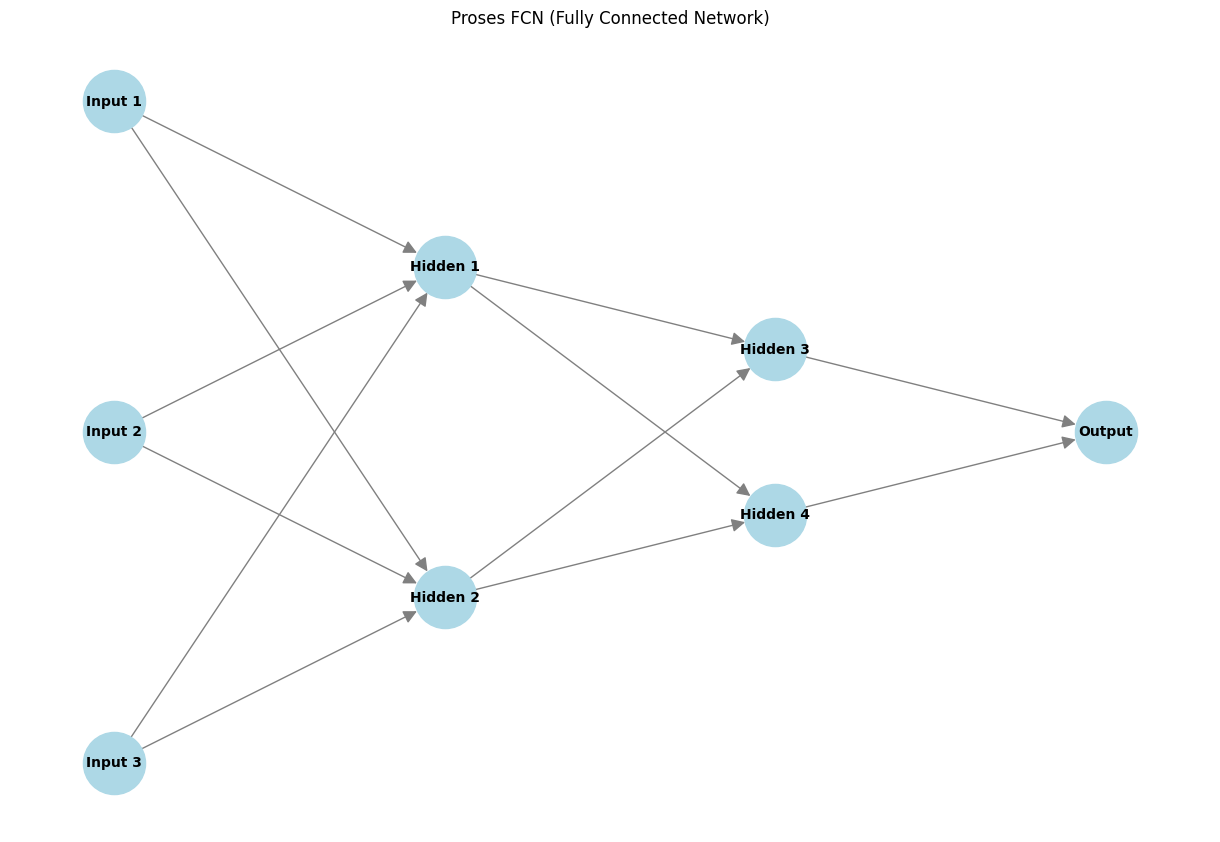

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# Buat graf kosong
G = nx.DiGraph()

# Tambahkan node untuk input, hidden layers, dan output
nodes = {
    'Input Layer': ['Input 1', 'Input 2', 'Input 3'],
    'Hidden Layer 1': ['Hidden 1', 'Hidden 2'],
    'Hidden Layer 2': ['Hidden 3', 'Hidden 4'],
    'Output Layer': ['Output']
}

# Menambahkan node ke graf
for layer, nodes_list in nodes.items():
    G.add_nodes_from(nodes_list)
    for node in nodes_list:
        G.nodes[node]['layer'] = layer

# Tambahkan edges antara layer-layer
edges = [
    ('Input 1', 'Hidden 1'), ('Input 1', 'Hidden 2'),
    ('Input 2', 'Hidden 1'), ('Input 2', 'Hidden 2'),
    ('Input 3', 'Hidden 1'), ('Input 3', 'Hidden 2'),
    ('Hidden 1', 'Hidden 3'), ('Hidden 1', 'Hidden 4'),
    ('Hidden 2', 'Hidden 3'), ('Hidden 2', 'Hidden 4'),
    ('Hidden 3', 'Output'), ('Hidden 4', 'Output')
]
G.add_edges_from(edges)

# Posisi node untuk menggambar graf
pos = {
    'Input 1': (0, 2), 'Input 2': (0, 1), 'Input 3': (0, 0),
    'Hidden 1': (1, 1.5), 'Hidden 2': (1, 0.5),
    'Hidden 3': (2, 1.25), 'Hidden 4': (2, 0.75),
    'Output': (3, 1)
}

# Gambar graf
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', arrows=True, arrowsize=20)
plt.title('Proses FCN (Fully Connected Network)')
plt.show()


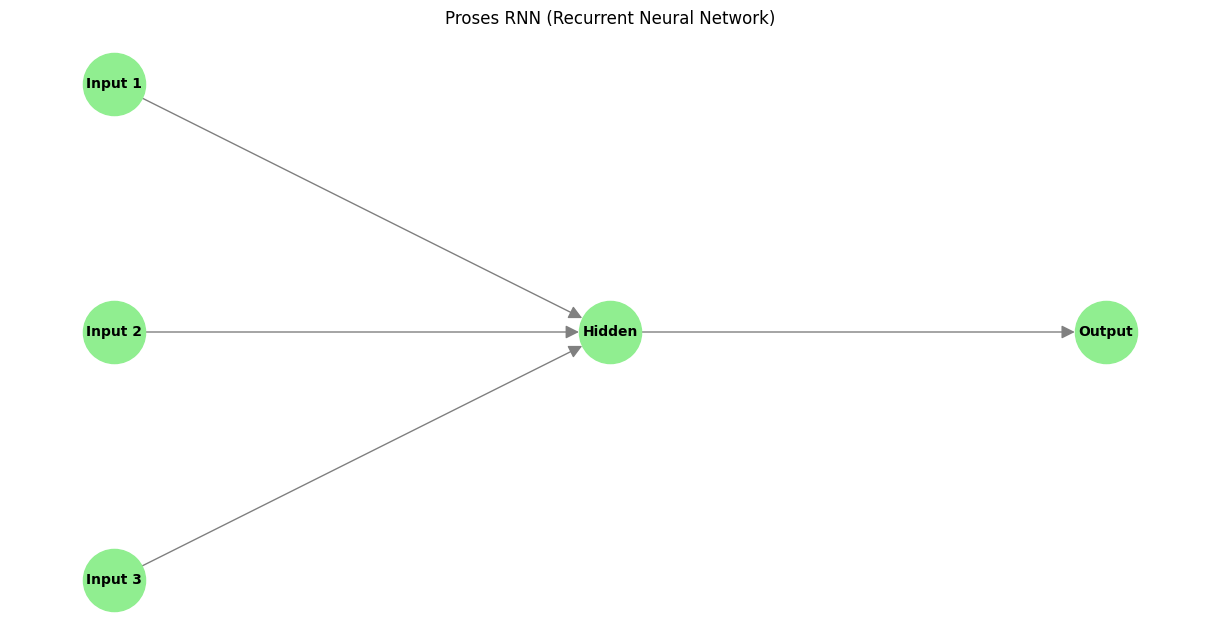

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

# Buat graf kosong
G_rnn = nx.DiGraph()

# Tambahkan node untuk input, recurrent layer, dan output
nodes_rnn = {
    'Input Layer': ['Input 1', 'Input 2', 'Input 3'],
    'Recurrent Layer': ['Hidden'],
    'Output Layer': ['Output']
}

# Menambahkan node ke graf
for layer, nodes_list in nodes_rnn.items():
    G_rnn.add_nodes_from(nodes_list)
    for node in nodes_list:
        G_rnn.nodes[node]['layer'] = layer

# Tambahkan edges antara layer-layer
edges_rnn = [
    ('Input 1', 'Hidden'), ('Input 2', 'Hidden'), ('Input 3', 'Hidden'),
    ('Hidden', 'Output')
]
G_rnn.add_edges_from(edges_rnn)

# Posisi node untuk menggambar graf
pos_rnn = {
    'Input 1': (0, 2), 'Input 2': (0, 1), 'Input 3': (0, 0),
    'Hidden': (1, 1), 'Output': (2, 1)
}

# Gambar graf
plt.figure(figsize=(12, 6))
nx.draw(G_rnn, pos_rnn, with_labels=True, node_size=2000, node_color='lightgreen', font_size=10, font_weight='bold', edge_color='gray', arrows=True, arrowsize=20)
plt.title('Proses RNN (Recurrent Neural Network)')
plt.show()


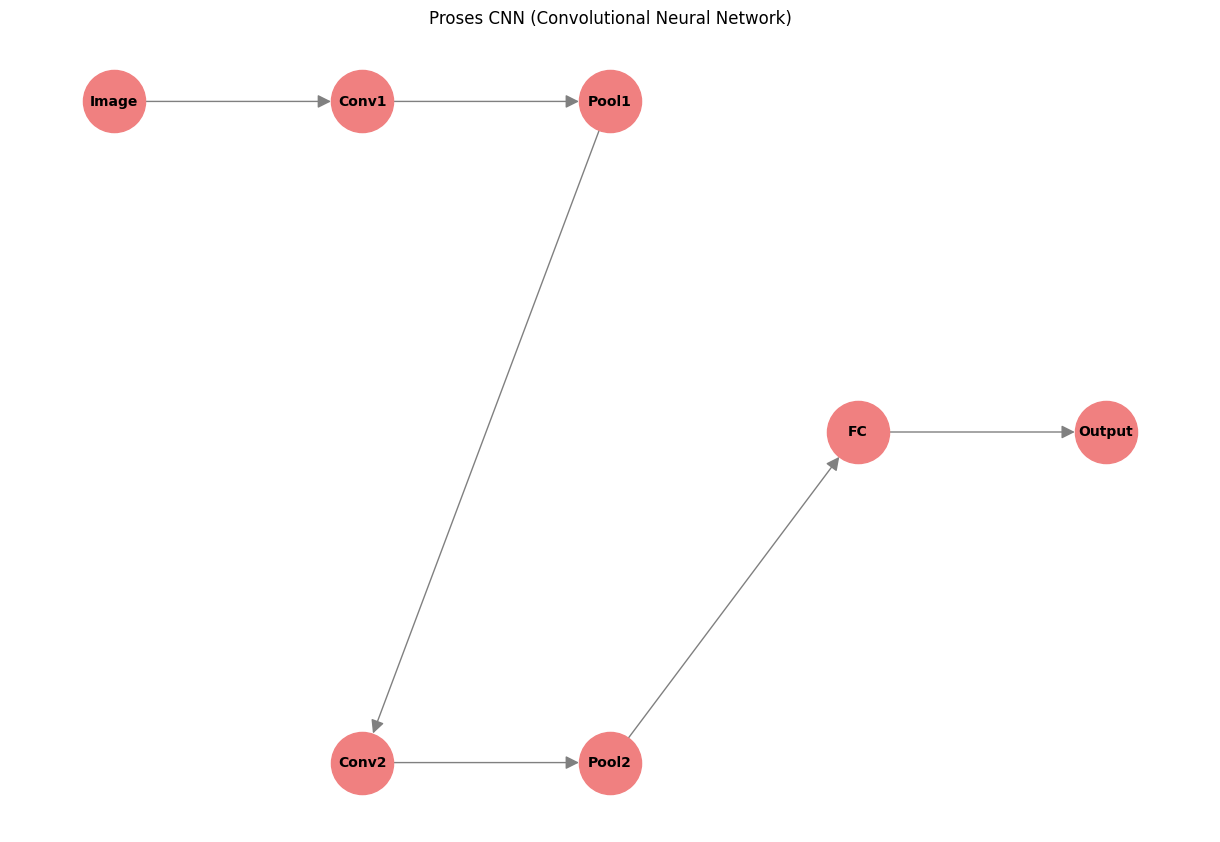

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

# Buat graf kosong
G_cnn = nx.DiGraph()

# Tambahkan node untuk input, convolutional layers, pooling layers, dan output
nodes_cnn = {
    'Input Layer': ['Image'],
    'Convolutional Layer 1': ['Conv1'],
    'Pooling Layer 1': ['Pool1'],
    'Convolutional Layer 2': ['Conv2'],
    'Pooling Layer 2': ['Pool2'],
    'Fully Connected Layer': ['FC'],
    'Output Layer': ['Output']
}

# Menambahkan node ke graf
for layer, nodes_list in nodes_cnn.items():
    G_cnn.add_nodes_from(nodes_list)
    for node in nodes_list:
        G_cnn.nodes[node]['layer'] = layer

# Tambahkan edges antara layer-layer
edges_cnn = [
    ('Image', 'Conv1'),
    ('Conv1', 'Pool1'),
    ('Pool1', 'Conv2'),
    ('Conv2', 'Pool2'),
    ('Pool2', 'FC'),
    ('FC', 'Output')
]
G_cnn.add_edges_from(edges_cnn)

# Posisi node untuk menggambar graf
pos_cnn = {
    'Image': (0, 1.5),
    'Conv1': (1, 1.5), 'Pool1': (2, 1.5),
    'Conv2': (1, 0.5), 'Pool2': (2, 0.5),
    'FC': (3, 1),
    'Output': (4, 1)
}

# Gambar graf
plt.figure(figsize=(12, 8))
nx.draw(G_cnn, pos_cnn, with_labels=True, node_size=2000, node_color='lightcoral', font_size=10, font_weight='bold', edge_color='gray', arrows=True, arrowsize=20)
plt.title('Proses CNN (Convolutional Neural Network)')
plt.show()
